In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[ 2.68678565,  2.45321744],
       [-1.63820975,  8.13664821],
       [-0.86635584,  9.73508694],
       ...,
       [-3.39186828, -4.55379079],
       [ 2.47365828,  3.35412412],
       [-0.04284168,  9.25309549]])

In [4]:
y

array([0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0,
       2, 1, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2,
       1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 0,
       1, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2,
       1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2,
       1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1, 1,
       1, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 2, 1,
       0, 2, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2,
       0, 2, 0, 1, 2, 0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 2,
       0, 0, 0, 1, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 1,

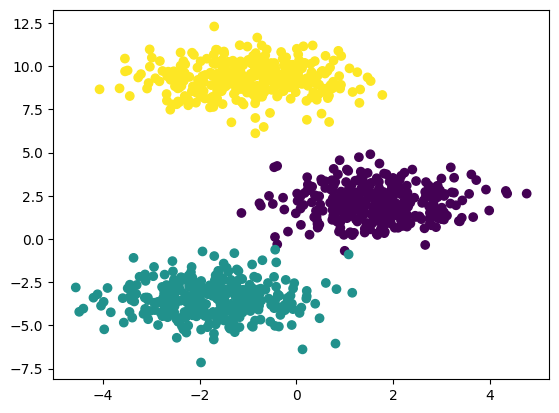

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
from sklearn.cluster import KMeans

In [12]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[1339.9999999999998,
 782.175264742094,
 237.86161988152853,
 184.49730005426673,
 141.84697056602295,
 144.20377779259945,
 85.49929850499802,
 85.83558368886736,
 71.02150978301108,
 56.21756388759552]

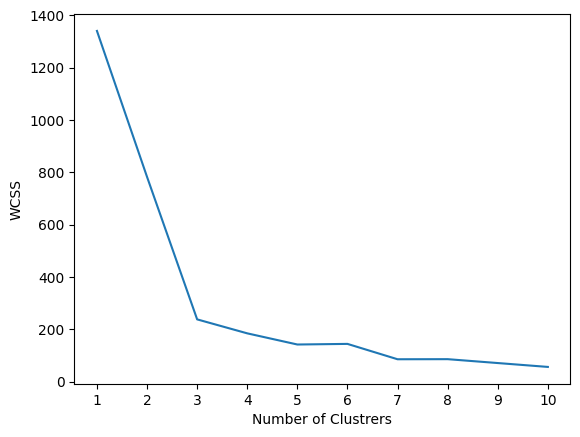

In [14]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [15]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [ ]:
kmeans.fit_predict(X_train_scaled)

In [17]:
y_pred=kmeans.predict(X_test_scaled)

In [ ]:
y_pred

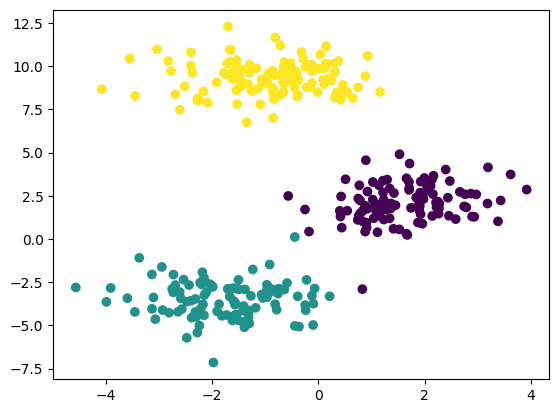

In [19]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [ ]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [22]:
## kneelocator
#!pip install kneed

In [24]:
from kneed import KneeLocator

In [25]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [26]:
kl.elbow

3

In [27]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [28]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [29]:
silhouette_coefficients

[0.5054924167508759,
 0.6441040514529617,
 0.5558150821301479,
 0.5076258503263505,
 0.4635331424657725,
 0.44686317738107606,
 0.4452920763315706,
 0.414489086482209,
 0.419171557456715]

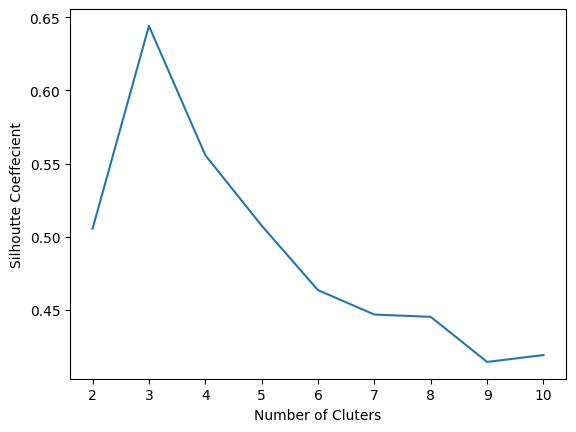

In [30]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()